# Linear Regression

## Importing data

In [102]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

In [103]:
#!pip list

In [104]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
# Importing the datasets
df = pd.read_csv('alena.csv')

In [106]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
0,1,337,4.770685,1.386294,4.5,9.65,1,0.92
1,2,324,4.672829,1.386294,4.5,8.87,1,0.76
2,3,316,4.644391,1.098612,3.5,8.00,1,0.72
3,4,322,4.700480,1.098612,2.5,8.67,1,0.80
4,5,314,4.634729,0.693147,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,396,324,4.700480,1.098612,3.5,9.04,1,0.82
396,397,325,4.672829,1.098612,3.5,9.11,1,0.84
397,398,330,4.753590,1.386294,4.5,9.45,1,0.91
398,399,312,4.634729,1.098612,4.0,8.78,0,0.67


# Correlations

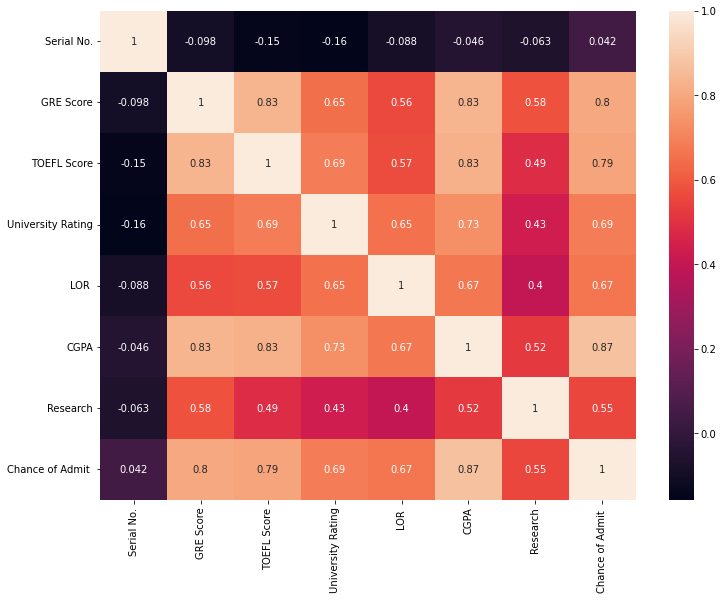

In [107]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Можем сделать вывод что наибольшую корреляцию с TOEFL Score даёт CGPA. Таким образом, мы будем строить однофакторную модель: зависимость TOEFL Score от CGPA.

# Splitting

In [108]:
X = df.iloc[:, [True,True,False,True,True,True,True,True]]
y = df['TOEFL Score']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X

,Serial No.,GRE Score,University Rating,LOR,CGPA,Research,Chance of Admit
0,1,337,1.386294,4.5,9.65,1,0.92
1,2,324,1.386294,4.5,8.87,1,0.76
2,3,316,1.098612,3.5,8.00,1,0.72
3,4,322,1.098612,2.5,8.67,1,0.80
4,5,314,0.693147,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
395,396,324,1.098612,3.5,9.04,1,0.82
396,397,325,1.098612,3.5,9.11,1,0.84
397,398,330,1.386294,4.5,9.45,1,0.91
398,399,312,1.098612,4.0,8.78,0,0.67


# Simple Linear Regression

In [109]:
f1 = ['CGPA']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

sr.coef_, sr.intercept_

(array([0.07807284]), 4.002606505963509)

Т.е. TOEFL Score=0.07*CGPA+4.002

In [110]:
y_pred = sr.predict(X_test[f1])

sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.698, 0.622)

Таким образом TOEFL Score зависит от теста CGPA на 69%

In [111]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.03, 0.04)

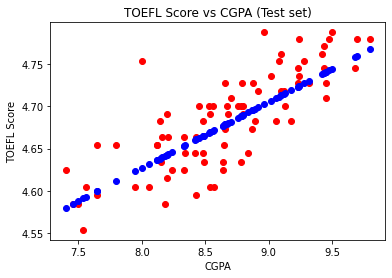

In [112]:
# Visualising the Test set results
plt.scatter(X_test['CGPA'], y_test, color = 'red')
plt.plot(X_test['CGPA'], sr.predict(X_test[f1]), 'bo')
plt.title('TOEFL Score vs CGPA (Test set)')
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.show()

# Multiple Linear Regression

In [115]:
!pip install statsmodels

In [113]:
mr = LinearRegression().fit(X_train, y_train)
mr.score(X_train, y_train).round(3)

0.776

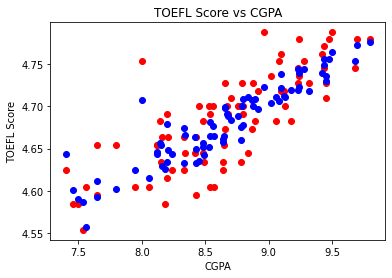

In [114]:
plt.scatter(X_test['CGPA'], y_test, color = 'red')
plt.plot(X_test['CGPA'], mr.predict(X_test), 'bo')
plt.title('TOEFL Score vs CGPA')
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.show()

In [116]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOEFL Score   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     154.5
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.06e-97
Time:                        19:59:25   Log-Likelihood:                 706.86
No. Observations:                 320   AIC:                            -1398.
Df Residuals:                     312   BIC:                            -1368.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.8024      0.069     55.031      0.000       3.666       3.938
Serial No.        -3.436e-05   1.38e-05     -2.494      0.013   -6.15e-05   -7.25e-06
GRE Score             0.0019      0.000      6.899      0.000       0.001       0.002
University Rating     0.0182      0.006      3.115      0.002       0.007       0.030
LOR                  -0.0026      0.002     -1.078      0.282      -0.007       0.002
CGPA                  0.0260      0.006      4.112      0.000       0.014       0.038
Research             -0.0017      0.004     -0.432      0.666      -0.009       0.006
Chance of Admit       0.0761      0.025      3.106      0.002       0.028       0.124
==============================================================================
Omnibus:                        5.184   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.633
Skew:                          -0.187   Prob(JB):                       0.0598
Kurtosis:                       3.532   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Переменные LOR, Research не являются статистически значими по сравнению с остальными переменными

In [117]:
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)
pr = LinearRegression().fit(X_train_p, y_train)
pr.coef_, pr.intercept_

(array([ 1.06167432e+07,  1.34094900e-03,  6.64067177e-03,  1.60012334e-01,
         6.66886320e-02,  9.65702184e-02, -7.28164433e-02, -7.08017435e-01,
        -5.74412831e-08, -4.10067469e-06,  9.27660377e-05,  2.56290400e-05,
        -6.45690418e-05, -7.19732017e-05,  5.01307880e-04, -1.34187127e-05,
        -5.98969973e-04, -4.78862511e-04,  7.22177689e-04, -1.73991603e-04,
         8.18041986e-04,  2.57132744e-02, -2.40442522e-02,  1.29493933e-02,
         4.47872756e-03, -8.44139287e-02,  5.71891313e-03,  7.57694078e-03,
        -1.73540759e-02,  1.11979167e-02, -2.24126437e-02,  3.38522107e-02,
         4.82260413e-02, -7.28164432e-02, -2.82614372e-02,  8.50923936e-02]),
 -10616740.393265132)

In [118]:
y_pred = pr.predict(X_test_p)
pr.score(X_train_p, y_train).round(3)

0.79

In [119]:
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.03, 0.03)

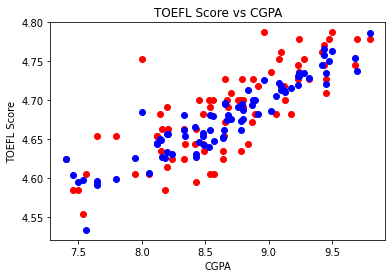

In [120]:
plt.scatter(X_test['CGPA'], y_test, color = 'red')
plt.plot(X_test['CGPA'], pr.predict(X_test_p), 'bo')
plt.title('TOEFL Score vs CGPA')
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.show()

# Pickle

In [121]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()